# K Means Clustering Analysis for Swing Detection


The purpose of this notebook is to produce a K-means clustering analysis for swing detection based on datasets of swings from Catapult GPS devices. 


Author: Karthik Guruvayurappan 
Date: May 15, 2020

In [2]:
# import packages for k-means analysis
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# import swing detection datasets from Catapult GPS devices
#swing_detection = pd.read_csv("karthik_swing_detection.csv")
swing_detection_100hz = pd.read_csv("karthik_swing_detection_100hz.csv")

FileNotFoundError: [Errno 2] File karthik_swing_detection_100hz.csv does not exist: 'karthik_swing_detection_100hz.csv'

In [4]:
# view 100hz swing detection data
swing_detection_100hz.head(20)

NameError: name 'swing_detection_100hz' is not defined

In [4]:
len(swing_detection_100hz)

122652

In [5]:
top = swing_detection_100hz.iloc[80000:81001]

In [6]:
top = top[['TimeStamp', 'Acceleration.side', 'Rotation.yaw', 'RawPlayerLoad', 'SmoothedPlayerLoad']]

([<matplotlib.axis.XTick at 0x190c4ee00c8>,
 <a list of 11 Text xticklabel objects>)

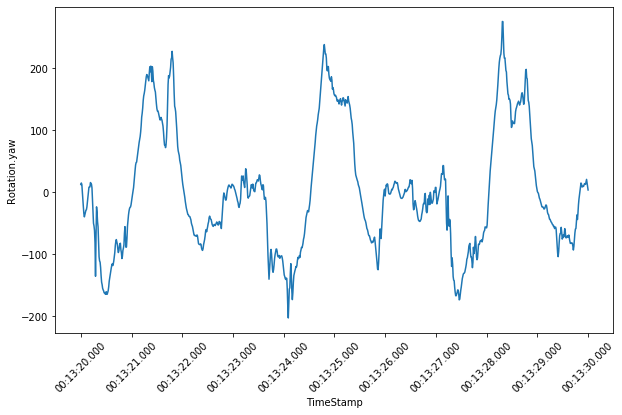

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
sb.lineplot(top['TimeStamp'], top['Rotation.yaw'],)
plt.xticks(top['TimeStamp'].iloc[0::100].to_list(), rotation=45)

In [30]:
middle = swing_detection_100hz.iloc[100000:101001]
middle = middle[['TimeStamp', 'Rotation.yaw']]

([<matplotlib.axis.XTick at 0x190d5b6e5c8>,
 <a list of 11 Text xticklabel objects>)

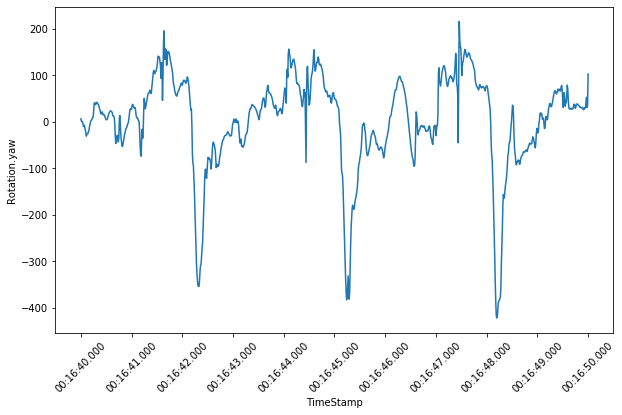

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sb.lineplot(middle['TimeStamp'], middle['Rotation.yaw'],)
plt.xticks(middle['TimeStamp'].iloc[0::100].to_list(), rotation=45)

The dataset has 100 data points per second, which is too many to detect swings. This is handled by reducing the dataset, taking 10 data points per second

In [75]:
hertz_mod = 100
swing_detection_100hz_mod = swing_detection_100hz.iloc[::hertz_mod, :]
swing_detection_100hz_mod

,TimeStamp,Acceleration.forward,Acceleration.side,Acceleration.up,Rotation.roll,Rotation.pitch,Rotation.yaw,RawPlayerLoad,SmoothedPlayerLoad,imuAcceleration.forward,...,Longitude,Odometer,RawVelocity,SmoothedVelocity,GNSS.LPS.Acceleration,MetabolicPower,GNSS.Fix,GNSS.Strength,GNSS.HDOP,HeartRate
0,00:00.0,-0.922020,-0.008228,0.257004,-12.688,-4.941,4.270,0.506348,0.097728,-0.917566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100,00:01.0,-0.957836,0.099704,0.188276,-24.644,13.054,-5.246,0.008789,0.099683,-0.177926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
200,00:02.0,-0.968484,0.086152,0.743908,-57.462,-116.388,-48.678,0.019531,0.297282,-0.242520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
300,00:03.0,0.156816,-0.762784,0.790856,247.904,197.518,-103.822,0.049316,0.327458,0.142195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
400,00:04.0,-0.445764,0.229900,0.600644,-43.676,-54.961,-31.903,0.027832,0.206247,0.038869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122200,20:22.0,-0.947188,-0.253616,0.196504,0.305,4.270,8.174,0.013672,0.119483,0.024589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
122300,20:23.0,-0.944284,-0.174724,0.108900,14.579,0.915,-24.888,0.018555,0.083474,-0.067978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
122400,20:24.0,-0.948156,-0.259908,0.203280,-5.490,-8.662,9.760,0.026367,0.156433,0.004330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
122500,20:25.0,-0.985424,-0.339284,0.054208,-4.270,-9.089,-41.907,0.026367,0.177984,0.038632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


There are three types of rotation presented in the 100hz dataset for swings. Yaw rotation represents rotation around the z-axis, which is what will be particularly applicable to performing a K-means clustering for this dataset

## Generate Exploratory Data Plots for K Means

In [76]:
# isolate yaw rotation data
yaw_rotation = swing_detection_100hz['Rotation.yaw']
yaw_rotation

0          4.270
1          4.758
2          4.941
3          4.575
4          2.928
           ...  
122647    22.631
122648    18.178
122649    22.753
122650    27.877
122651    62.586
Name: Rotation.yaw, Length: 122652, dtype: float64

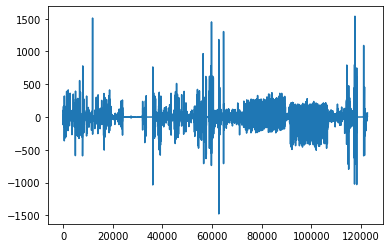

In [77]:
# plot yaw rotation data
plt.plot(yaw_rotation)

In [78]:
# isolate side acceleration data
side_accel = swing_detection_100hz['Acceleration.side']
side_accel

0        -0.008228
1        -0.007260
2        -0.009680
3        -0.005808
4        -0.007744
            ...   
122647   -0.253616
122648   -0.200376
122649   -0.195536
122650   -0.222640
122651   -0.275396
Name: Acceleration.side, Length: 122652, dtype: float64

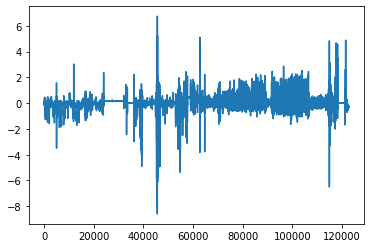

In [79]:
# plot sideways acceleration
plt.plot(side_accel)

In [80]:
# isolate player load
player_load = swing_detection_100hz['RawPlayerLoad']
player_load

0         0.506348
1         0.241211
2         0.115234
3         0.057617
4         0.030273
            ...   
122647    0.026856
122648    0.018066
122649    0.020019
122650    0.015625
122651    0.257324
Name: RawPlayerLoad, Length: 122652, dtype: float64

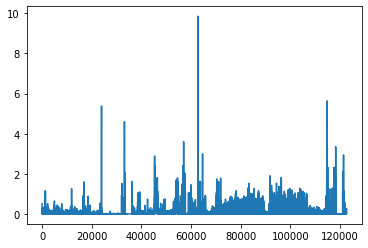

In [81]:
# plot player load
plt.plot(player_load)

## Create K Means Analysis

In [97]:
# create K Means object
kmeans = KMeans(n_clusters = 2)

In [98]:
# create 2D array for K Means
kmeans_data = []

for i in range(len(yaw_rotation)):
    kmeans_data.append([yaw_rotation[i], side_accel[i]])

In [99]:
kmeans.fit(kmeans_data)

KMeans(n_clusters=2)

In [100]:
centroids = kmeans.cluster_centers_

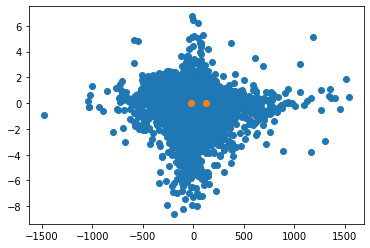

In [101]:
plt.scatter(yaw_rotation, side_accel)
plt.scatter(centroids[:, 0], centroids[:, 1])